# Content-Based Filtering

In [7]:
import pandas
movies = pandas.read_csv("movies.csv", sep=",")

In [102]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
movies["overview"] = movies["overview"].fillna("")


In [10]:
tfidf_matrix = tfidf.fit_transform(movies["overview"])

In [11]:
tfidf_matrix.shape

(4803, 20978)

# Plot distribution of TF-IDF scores

In [12]:
import os
os.makedirs('plots/content', exist_ok=True)

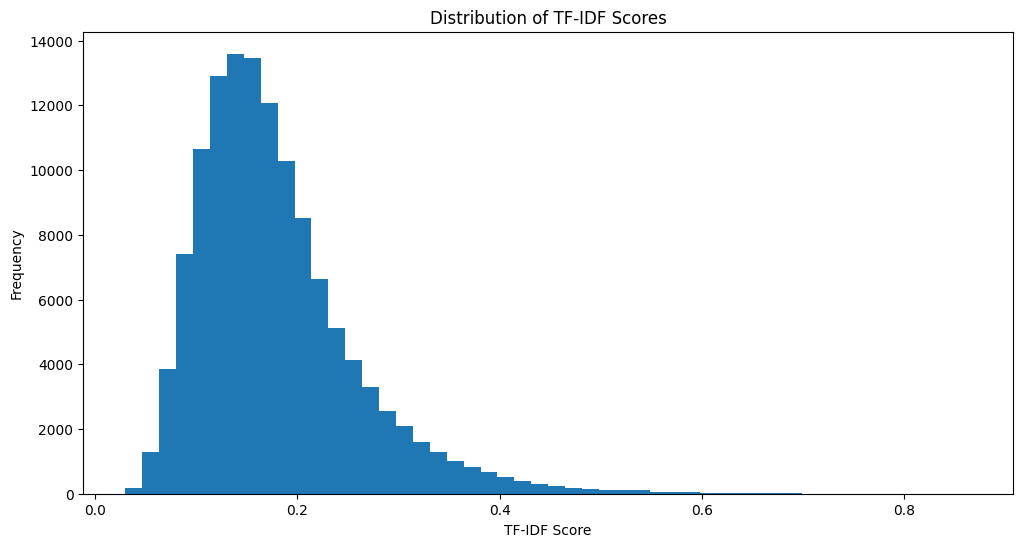

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(tfidf_matrix.data, bins=50)
title = 'Distribution of TF-IDF Scores'
plt.title(title)
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.savefig(f'plots/content/top_words_{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

# Get top words for a sample movie

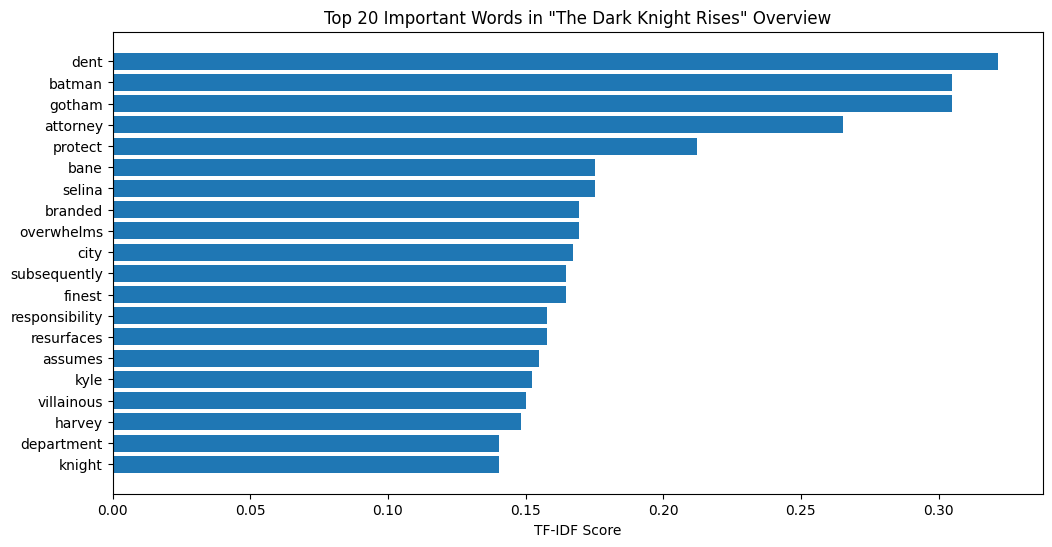

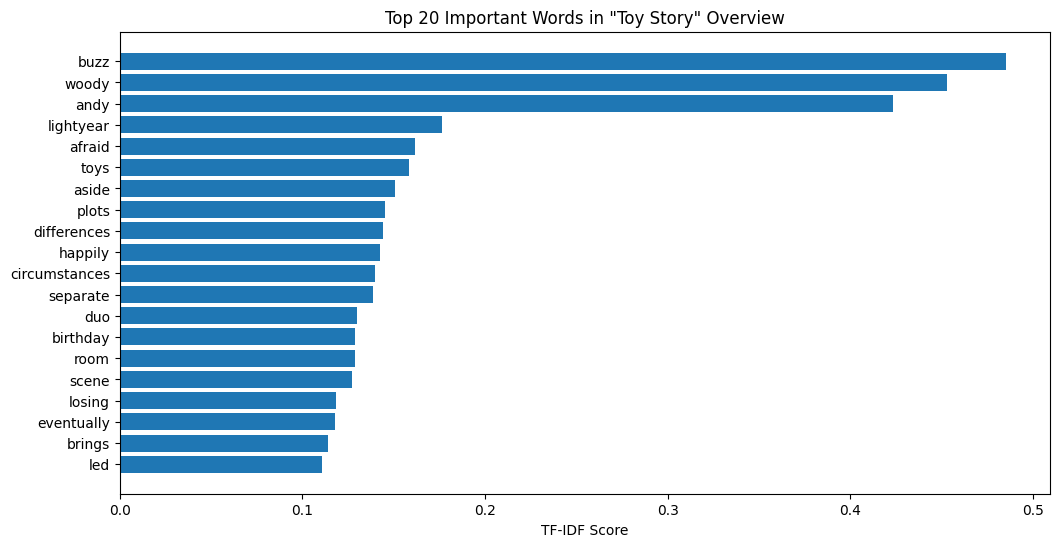

In [15]:
def plot_top_words(movie_title, n_words=20):
    try:
        idx = movies[movies["title"] == movie_title].index[0]
        feature_names = tfidf.get_feature_names_out()
        movie_tfidf = tfidf_matrix[idx].toarray().flatten()
        top_indices = movie_tfidf.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_scores = [movie_tfidf[i] for i in top_indices]
        
        plt.figure(figsize=(12, 6))
        plt.barh(top_words, top_scores)
        plt.title(f'Top {n_words} Important Words in "{movie_title}" Overview')
        plt.xlabel('TF-IDF Score')
        plt.gca().invert_yaxis()
        plt.savefig(f'plots/content/top_words_{movie_title.lower().replace(" ", "_")}.png', bbox_inches='tight')
        plt.show()
    except IndexError:
        print(f"Movie '{movie_title}' not found in dataset.")

plot_top_words("The Dark Knight Rises")
plot_top_words("Toy Story")

### Similarity matrix

In [17]:
from sklearn.metrics.pairwise import linear_kernel
similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

In [18]:
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

# Function to visualize similarity between movies

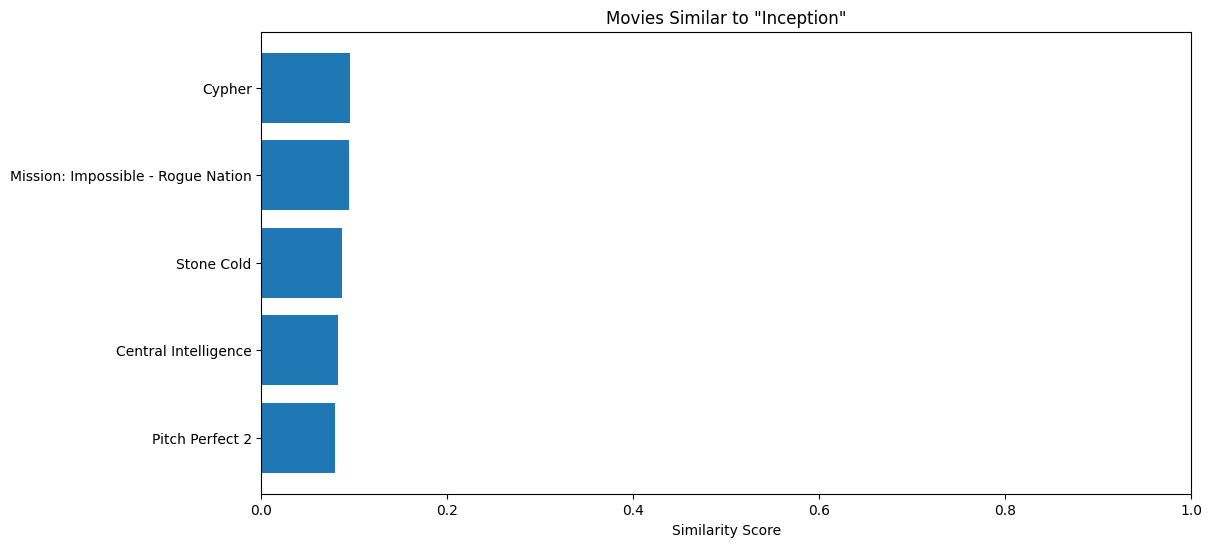

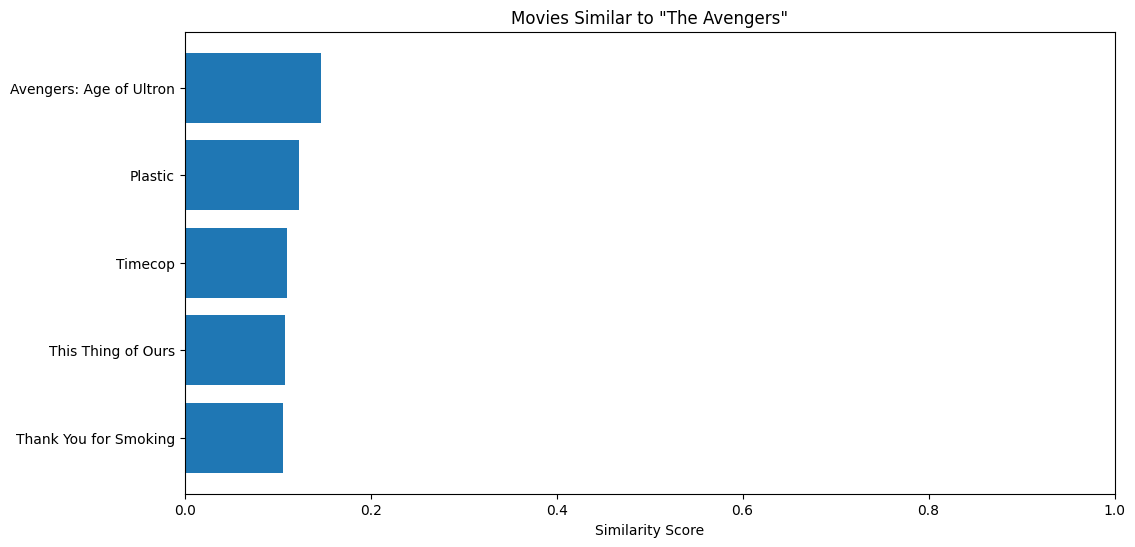

In [19]:
def visualize_similarity(movie_title, n_similar=5):
    try:
        idx = movies[movies["title"] == movie_title].index[0]
        scores = list(enumerate(similarity_matrix[idx]))
        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        top_indices = [tpl[0] for tpl in scores[1:n_similar+1]]
        top_scores = [tpl[1] for tpl in scores[1:n_similar+1]]
        top_titles = [movies.iloc[i]["title"] for i in top_indices]
        
        plt.figure(figsize=(12, 6))
        plt.barh(top_titles, top_scores)
        plt.title(f'Movies Similar to "{movie_title}"')
        plt.xlabel('Similarity Score')
        plt.xlim(0, 1)
        plt.gca().invert_yaxis()
        plt.savefig(f'plots/content/top_words_{movie_title.lower().replace(" ", "_")}.png', bbox_inches='tight')
        plt.show()
    except IndexError:
        print(f"Movie '{movie_title}' not found in dataset.")

visualize_similarity("Inception")
visualize_similarity("The Avengers")

### Find the most similar movies to a certain movie

In [111]:
movie_title = "John Carter"

In [112]:
idx = movies.loc[movies["title"]==movie_title].index[0]
idx

np.int64(4)

In [113]:
scores = list(enumerate(similarity_matrix[idx]))

In [114]:
scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [115]:
scores

[(4, np.float64(0.9999999999999998)),
 (1254, np.float64(0.20497253140891997)),
 (4161, np.float64(0.16370347641323713)),
 (2932, np.float64(0.12239400129620456)),
 (3349, np.float64(0.11887151040572358)),
 (1307, np.float64(0.11468689553107403)),
 (3068, np.float64(0.11237609168095009)),
 (345, np.float64(0.09079218287485014)),
 (581, np.float64(0.0900594125581888)),
 (2998, np.float64(0.08877535757173034)),
 (4274, np.float64(0.08576462030578072)),
 (46, np.float64(0.08574401380341932)),
 (1735, np.float64(0.08506583325352486)),
 (2755, np.float64(0.08374900580033416)),
 (2968, np.float64(0.08283973259290776)),
 (1057, np.float64(0.07986162067710445)),
 (85, np.float64(0.07927219338261442)),
 (322, np.float64(0.0782683431858148)),
 (1300, np.float64(0.07757415810488381)),
 (2300, np.float64(0.07715566889765219)),
 (2155, np.float64(0.0771306511373995)),
 (2417, np.float64(0.07556384384487905)),
 (694, np.float64(0.07473047732188678)),
 (2265, np.float64(0.0714410805050381)),
 (373, n

In [116]:
movies_indices = [tpl[0] for tpl in scores[1:4]]
movies_indices

[1254, 4161, 2932]

In [117]:
list(movies["title"].iloc[movies_indices])

['Get Carter', 'The Marine 4: Moving Target', 'Raising Cain']

# Recommendation System with Plots

In [118]:
def similar_movies_with_scores(movie_title, nr_movies=5):
    # Find the index of the movie
    idx = movies[movies["title"] == movie_title].index[0]
    
    # Get similarity scores
    scores = list(enumerate(similarity_matrix[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    # Get top similar movies
    movies_indices = [tpl[0] for tpl in scores[1:nr_movies+1]]
    similar_scores = [tpl[1] for tpl in scores[1:nr_movies+1]]
    similar_titles = list(movies["title"].iloc[movies_indices])
    
    # Create dataframe for visualization
    recommendations = pandas.DataFrame({
        'Movie': similar_titles,
        'Similarity Score': similar_scores
    })
    
    # Plot recommendations
    plt.figure(figsize=(12, 6))
    plt.barh(recommendations['Movie'], recommendations['Similarity Score'], color='skyblue')
    plt.title(f'Top {nr_movies} Movies Similar to "{movie_title}"')
    plt.xlabel('Content Similarity Score')
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()
    plt.show()
    
    return recommendations





# Example usage

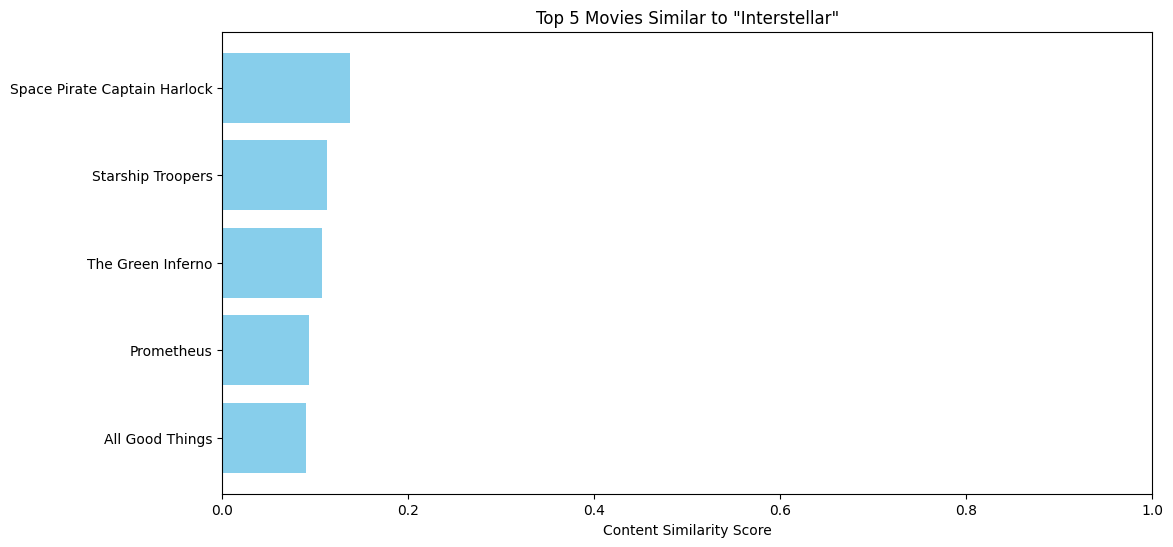

,Movie,Similarity Score
0,Space Pirate Captain Harlock,0.137461
1,Starship Troopers,0.112302
2,The Green Inferno,0.106682
3,Prometheus,0.093546
4,All Good Things,0.089810


In [119]:
similar_movies_with_scores("Interstellar")

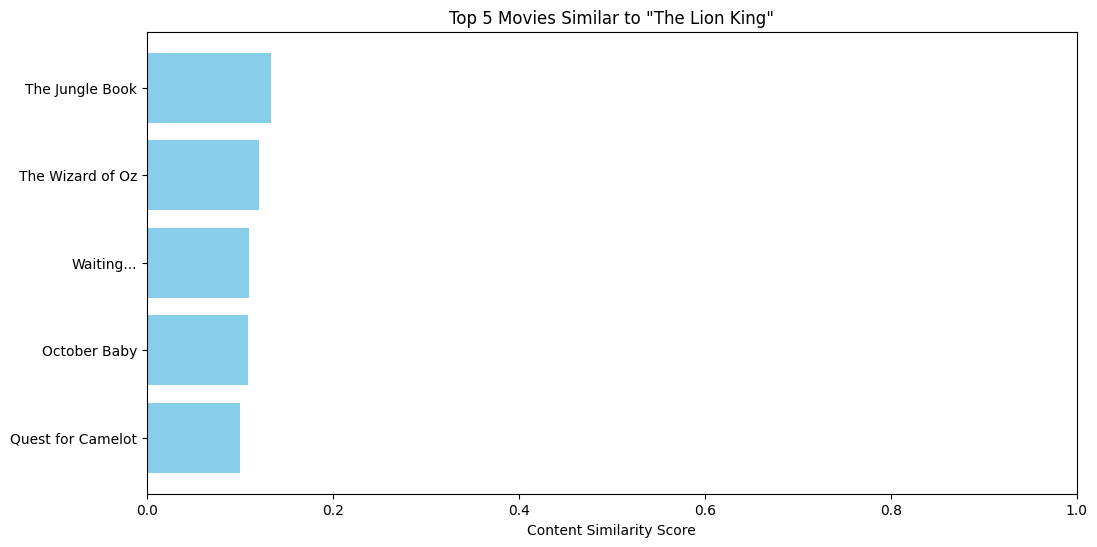

,Movie,Similarity Score
0,The Jungle Book,0.133324
1,The Wizard of Oz,0.120767
2,Waiting...,0.109983
3,October Baby,0.108768
4,Quest for Camelot,0.100391


In [120]:
similar_movies_with_scores("The Lion King")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48f880f8-2f58-41e7-b0c8-ce2863059d0d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Genre Analysis

In [121]:
import ast

# Extract genres from the string format

In [122]:
movies['genres_list'] = movies['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])

# Function to analyze genre patterns in recommendations

In [123]:
def analyze_genre_patterns(movie_title, nr_movies=10):
    idx = movies[movies["title"] == movie_title].index[0]
    scores = list(enumerate(similarity_matrix[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    movies_indices = [tpl[0] for tpl in scores[1:nr_movies+1]]
    
    # Get genres of similar movies
    similar_genres = movies.iloc[movies_indices]['genres_list'].explode()
    genre_counts = similar_genres.value_counts()
    
    # Plot genre distribution
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar')
    plt.title(f'Genre Distribution in Movies Similar to "{movie_title}"')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    return genre_counts

# Example usage

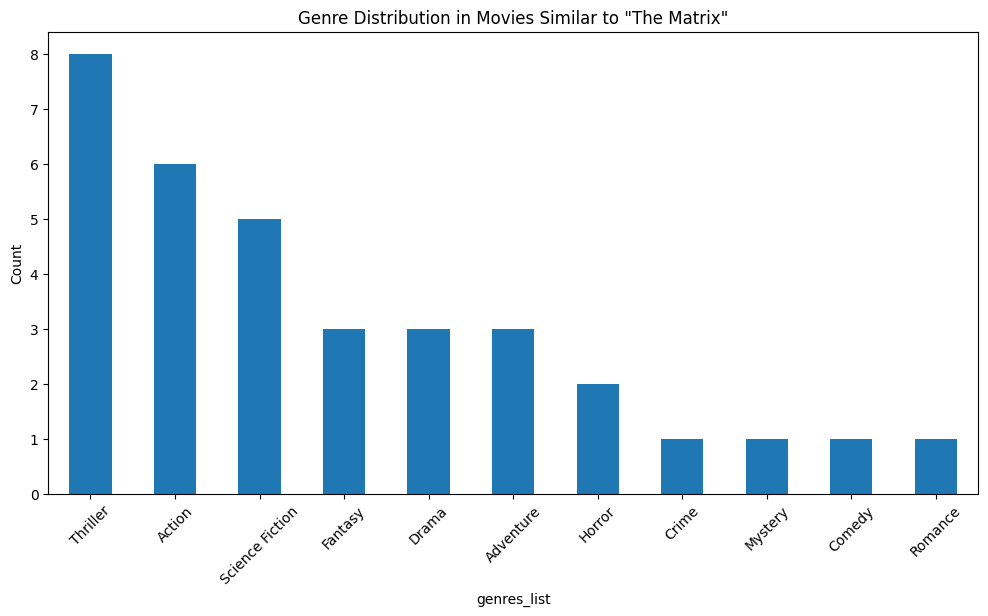

genres_list
Thriller           8
Action             6
Science Fiction    5
Fantasy            3
Drama              3
Adventure          3
Horror             2
Crime              1
Mystery            1
Comedy             1
Romance            1
Name: count, dtype: int64

In [124]:
analyze_genre_patterns("The Matrix")

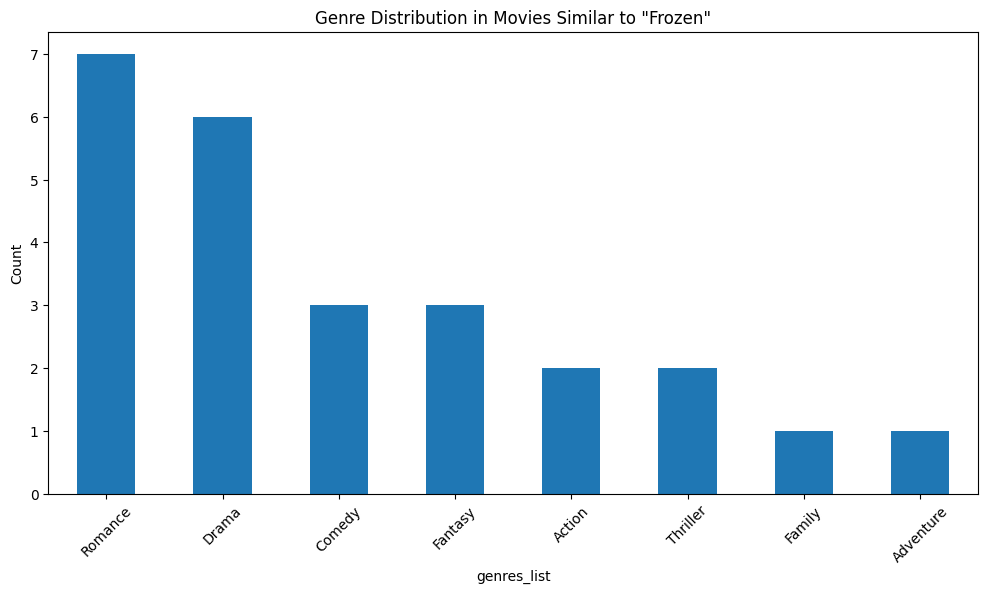

genres_list
Romance      7
Drama        6
Comedy       3
Fantasy      3
Action       2
Thriller     2
Family       1
Adventure    1
Name: count, dtype: int64

In [125]:
analyze_genre_patterns("Frozen")